In [1]:
### Market Basket Analysis on Groceries Data using Apriori Algorithm.
##
### Importing the required libraries.
##

import numpy as np
import pandas                                                 as pd
import matplotlib                                             as mp
from   matplotlib                    import pyplot            as plt
from   mlxtend.frequent_patterns     import apriori           as ap
from   mlxtend.frequent_patterns     import association_rules as ar

##
## Let's import the dataset from local system.
##

csv_path = '/home/ruth/dataminingassignment/Market_Basket_Optimisation.csv'
items_data_df = pd.read_csv(csv_path, header=None)
print(items_data_df.head())



              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [2]:
##
## Majority of the records have Na or NaN. Let's analyze how many unique values we have.
##

unique_items = (items_data_df[0].unique())
print(unique_items)



['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

In [3]:
##
## Based on the unique items we got, we will perform one-hot-encoding.
## The dataset will be converted to a format that has just 0s or 1s. It can also have True or False.
## Custom One Hot Encoding
##
## Python code for one hot encoding
##

encoded_vals = []
for i, rows in items_data_df.iterrows():
	labels          = {}
	uncommons       = list(set(unique_items) - set(rows))
	commons         = list(set(unique_items).intersection(rows))
	for uc in uncommons:
		labels[uc]  = 0
	for com in commons:
		labels[com] = 1
	encoded_vals.append(labels)
encoded_vals[0]

encode_df = pd.DataFrame(encoded_vals)

print(encode_df.head())



   corn  gluten free bar  burgers  flax seed  frozen vegetables  \
0     0                0        0          0                  0   
1     0                0        1          0                  0   
2     0                0        0          0                  0   
3     0                0        0          0                  0   
4     0                0        0          0                  0   

   strong cheese  light mayo  bacon  clothes accessories  whole wheat pasta  \
0              0           0      0                    0                  0   
1              0           0      0                    0                  0   
2              0           0      0                    0                  0   
3              0           0      0                    0                  0   
4              0           0      0                    0                  0   

   ...  frozen smoothie  green grapes  avocado  antioxydant juice  \
0  ...                1             1        1       

In [4]:
##
## Defining the apriori algorithm.
##

freq_items = ap(encode_df, min_support=0.0085, use_colnames=True, verbose=1, low_memory=False)
print(freq_items.head())



/home/ruth/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 152 combinations | Sampling itemset size 43
    support             itemsets
0  0.087188            (burgers)
1  0.009065          (flax seed)
2  0.095321  (frozen vegetables)
3  0.027196         (light mayo)
4  0.008666              (bacon)


In [5]:
##
## Defining the association rules algorithms to match and find similar items together based on confidence.
##

assocn_rules_conf   = ar(freq_items, metric="confidence", min_threshold=0.25)
print(assocn_rules_conf)



                    antecedents      consequents  antecedent support  \
0                     (burgers)   (french fries)            0.087188   
1                     (burgers)           (eggs)            0.087188   
2                     (burgers)  (mineral water)            0.087188   
3           (frozen vegetables)      (spaghetti)            0.095321   
4           (frozen vegetables)  (mineral water)            0.095321   
..                          ...              ...                 ...   
132       (eggs, mineral water)      (spaghetti)            0.050927   
133         (spaghetti, shrimp)  (mineral water)            0.021197   
134     (shrimp, mineral water)      (spaghetti)            0.023597   
135      (spaghetti, olive oil)  (mineral water)            0.022930   
136  (olive oil, mineral water)      (spaghetti)            0.027596   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.170911  0.021997    0.252294  1.47617

In [6]:
##
## Defining the association rules algorithms to match and find similar items together based on support.
##
assocn_rules_supp   = ar(freq_items, metric="support", min_threshold=0.005)
print(assocn_rules_supp)



                    antecedents                 consequents  \
0           (frozen vegetables)                   (burgers)   
1                     (burgers)         (frozen vegetables)   
2                     (burgers)                  (pancakes)   
3                    (pancakes)                   (burgers)   
4                     (burgers)                      (milk)   
..                          ...                         ...   
615  (spaghetti, mineral water)                 (olive oil)   
616  (olive oil, mineral water)                 (spaghetti)   
617                 (spaghetti)  (olive oil, mineral water)   
618                 (olive oil)  (spaghetti, mineral water)   
619             (mineral water)      (spaghetti, olive oil)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.095321            0.087188  0.010532    0.110490  1.267250   
1              0.087188            0.095321  0.010532    0.120795  1.267250   
2     

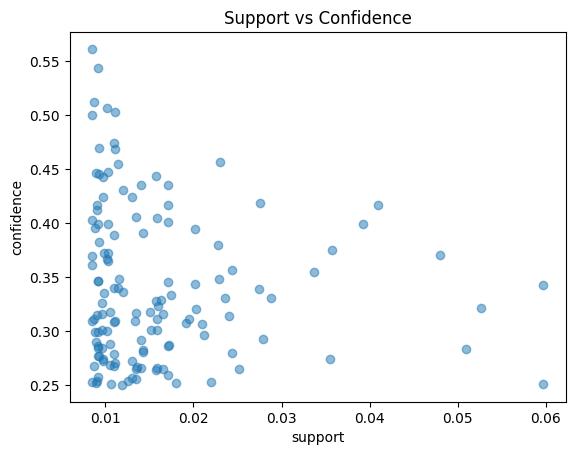

In [7]:
##
##
## Plotting the scatter plot of Confidence Vs Support
##

plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.savefig('Support vs Confidence')
plt.show()




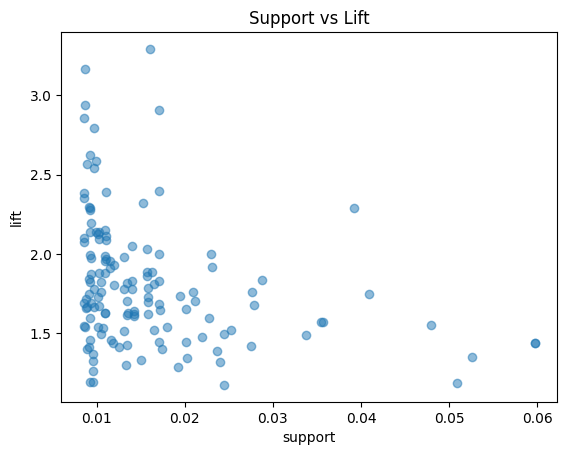

In [8]:
##
## Plotting the scatter plot of Lift Vs Support
##

plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.savefig('Support vs Lift')
plt.show()




In [11]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.2 MB/s eta 0:00:000:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
##
## Writing the generated rules based on confidence onto an excel file for business use.
##

w1 = pd.ExcelWriter('/home/ruth/dataminingassignment/Generated_Rules_conf.xlsx')
assocn_rules_conf.to_excel(w1, 'Rules')
w1._save() 


In [17]:
##
## Writing the generated rules based on support onto an excel file for business use.
##

w2 = pd.ExcelWriter('Generated_Rules_supp.xlsx')
assocn_rules_supp.to_excel(w2, 'Rules')
w2._save()